# TECNOLOGICO DE MONTEREY
## Reto-> Entrega 2 -> Clasificación-ensambles y presentación ejecutiva
### Maria de La Paz Rico
#### Noviembre - 2022

Cristian Miranda - A01793718

## Modulos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen


import warnings
warnings.filterwarnings('ignore')


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
import seaborn as sns


## Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, normalize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve, cross_val_score, cross_val_predict, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer, classification_report

import geopandas as gpd
from shapely.geometry import Point

import qeds

#!pip install git+https://github.com/pyjanitor-devs/pyjanitor.git
import janitor 


## Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import class_weight

## Carga de datos

In [8]:
# Dataset disponibles
archive = "http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip"
resp = urlopen(archive)
myzip = ZipFile(BytesIO(resp.read()))
myzip.namelist()

['Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz',
 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'Datos_de_calidad_del_agua_2020/Escalas_subterranea.csv',
 'Datos_de_calidad_del_agua_2020/Escalas_superficial.csv']

### 1.Limpieza de base de datos.

In [45]:
# Seleccion de aguas subterraneas
df = pd.read_csv( myzip.open('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'), encoding='windows-1252')
print('Dimension de base', df.shape)
df.head()

Dimension de base (1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Se verifican los valores nulos de la base para excluirlos o imputarlos.

In [48]:
# Porcentaje de valores nulos
df.isnull().sum() / df.shape[0] * 100

CLAVE                     0.000000
SITIO                     0.000000
ORGANISMO_DE_CUENCA       0.000000
ESTADO                    0.000000
MUNICIPIO                 0.000000
ACUIFERO                  0.000000
SUBTIPO                   0.000000
LONGITUD                  0.000000
LATITUD                   0.000000
PERIODO                   0.000000
ALC_mg/L                  0.374532
CALIDAD_ALC               0.374532
CONDUCT_mS/cm             0.561798
CALIDAD_CONDUC            0.561798
SDT_mg/L                100.000000
SDT_M_mg/L                0.187266
CALIDAD_SDT_ra            0.187266
CALIDAD_SDT_salin         0.187266
FLUORUROS_mg/L            0.000000
CALIDAD_FLUO              0.000000
DUR_mg/L                  0.093633
CALIDAD_DUR               0.093633
COLI_FEC_NMP/100_mL       0.000000
CALIDAD_COLI_FEC          0.000000
N_NO3_mg/L                0.093633
CALIDAD_N_NO3             0.093633
AS_TOT_mg/L               0.000000
CALIDAD_AS                0.000000
CD_TOT_mg/L         

Se decide por eliminar las columnas con valores nulos mayores al 20% y posteriormente se filtra la base con el resto de valores perdidos al ser menores al 10%

In [49]:
eliminar = ['CALIDAD_N_NO3','CLAVE','PERIODO','FE_TOT_mg/L', 'ORGANISMO_DE_CUENCA', 'ESTADO', 
           'MUNICIPIO','CONTAMINANTES','SUBTIPO','ACUIFERO','SDT_mg/L','SITIO']

df.drop(columns=eliminar,inplace=True)
df = df.dropna()
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


###  Exploración de datos

In [50]:
# Estadistica descriptiva
df.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471
std,6.697568,3.875005,111.147849,1248.990617
min,-116.664250,14.561150,26.640000,110.000000
25%,-105.385170,20.224857,164.257500,506.000000
50%,-102.170665,22.640705,215.825000,820.000000
75%,-98.971268,25.508770,292.930000,1328.000000
max,-86.864120,32.677713,1650.000000,18577.000000


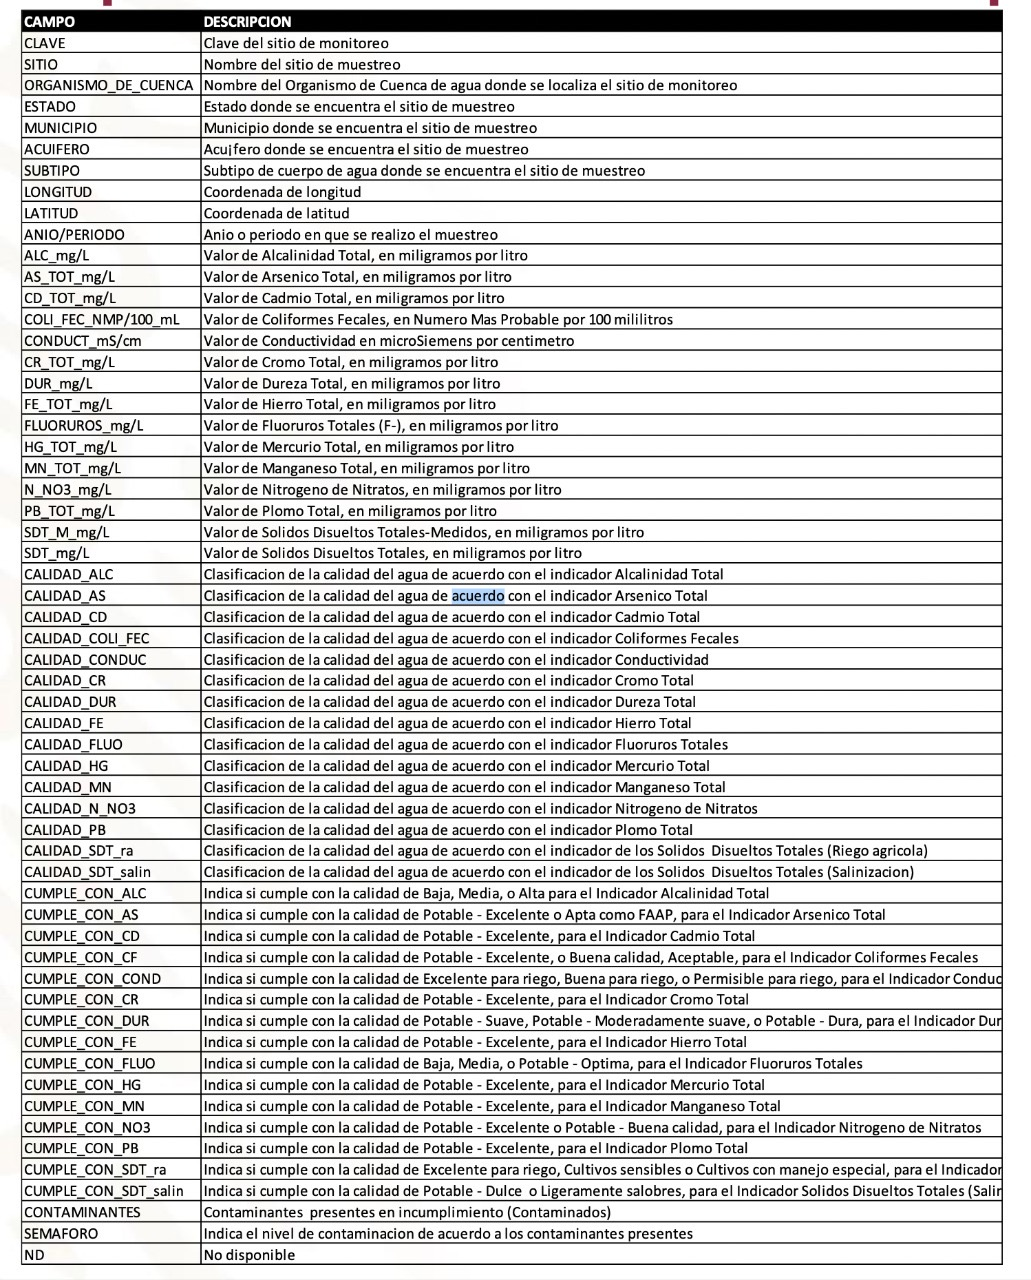

In [9]:
# Revisión de variables

from IPython.display import Image

Image('C:/Users/ADMIN/Downloads/WhatsApp Image 2022-11-13 at 8.28.54 PM.jpeg')

Se evaluan las columnas con valores del tipo `<valor` para convertir en numerico las que superen valores perdidos menores al 20% y el resto se excluyen de la base.

In [51]:
columnasAnalisis = list(df.columns[2:31])
excluir = []
corregir = []
for i in range(0,len(columnasAnalisis)):
  a = df[columnasAnalisis[i]].value_counts()
  aux = pd.DataFrame([a.index, a])
  amayorque = str(aux.iloc[0,0]) 
  aporcent = aux.iloc[1,0]/1068
  if amayorque.startswith('<') == True and aporcent > 0.20:
    excluir.append(columnasAnalisis[i])
    print('---------------')
    print(columnasAnalisis[i])
    print(amayorque)
    print(aporcent)
  if amayorque.startswith('<') == True and aporcent <= 0.20:
    corregir.append(columnasAnalisis[i])

---------------
COLI_FEC_NMP/100_mL
<1.1
0.6816479400749064
---------------
AS_TOT_mg/L
<0.01
0.7528089887640449
---------------
CD_TOT_mg/L
<0.003
0.9850187265917603
---------------
CR_TOT_mg/L
<0.005
0.7902621722846442
---------------
HG_TOT_mg/L
<0.0005
0.8960674157303371
---------------
PB_TOT_mg/L
<0.005
0.9588014981273408
---------------
MN_TOT_mg/L
<0.0015
0.5065543071161048


In [52]:
for i in range(len(corregir)):
    df[corregir[i]] = df[corregir[i]].str.extract(r"(\d+\.\d+|\d+)").astype(float)
    print(corregir[i])
    
df['SDT_M_mg/L'] = df['SDT_M_mg/L'].astype(float)
df.drop(columns=excluir,inplace=True)
df.columns

FLUORUROS_mg/L
DUR_mg/L
N_NO3_mg/L


Index(['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm',
       'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_AS', 'CALIDAD_CD',
       'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',
       'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

Existen valores extremos que se pueden identificar facilmente con un Boxplot:

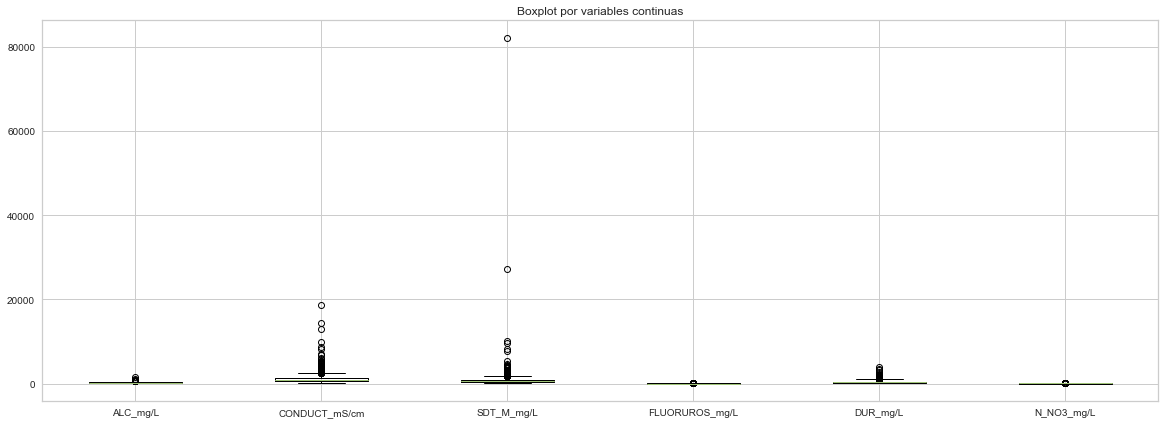

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

x = df.select_dtypes(numerics).columns.values
xx = [a for a in x if a not in ['LONGITUD', 'LATITUD']]


# Boxplot
plt.figure(figsize=(20,7))
plt.boxplot(df[xx],labels=xx)
plt.title('Boxplot por variables continuas')
plt.show()


Se generan las correlaciones de las variables numéricas:

<AxesSubplot:>

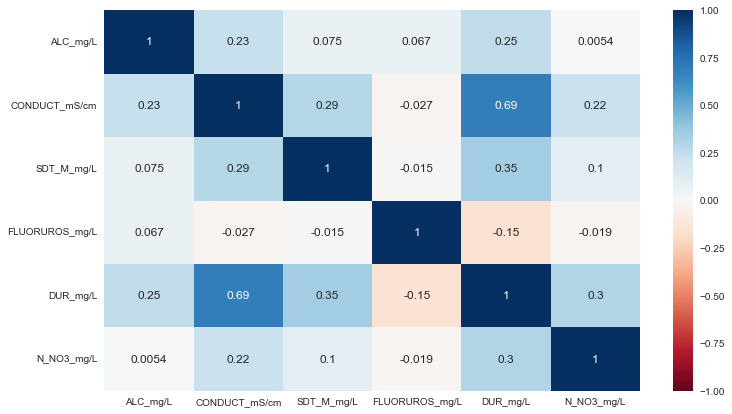

In [54]:
# Correlaciones
plt.figure(figsize=(12,7))

sns.heatmap(df[xx].corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')

Por último, se procede a dumificar las variables con respuesta binaria:

In [55]:
# Dummificacion de variables
s = [x.__contains__("CUMPLE") for x in df.columns.values]
for i in df[df.columns.values[s]]:
    df[i] = np.where(df[i]=='SI',1,0)
    print(i)

CUMPLE_CON_ALC
CUMPLE_CON_COND
CUMPLE_CON_SDT_ra
CUMPLE_CON_SDT_salin
CUMPLE_CON_FLUO
CUMPLE_CON_DUR
CUMPLE_CON_CF
CUMPLE_CON_NO3
CUMPLE_CON_AS
CUMPLE_CON_CD
CUMPLE_CON_CR
CUMPLE_CON_HG
CUMPLE_CON_PB
CUMPLE_CON_MN
CUMPLE_CON_FE


In [56]:
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,1,1,1,1,1,1,1,1,1,1
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,1,1,1,1,1,1,1,1,1,1
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,...,1,1,1,0,1,1,1,1,1,1
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,1,1,1,1,1,1,1,1,1,1
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,1,1,0,1,1,1,1,1,1,1


In [57]:
df.columns

Index(['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm',
       'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_AS', 'CALIDAD_CD',
       'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',
       'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

### 1.Selección de variables independientes y dependientes  
Selecciona variables de independientes y dependiente (semáforo). Ademas, adecua el formato de la variable y, a label encoding.

In [58]:
df['SEMAFORO']

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1054, dtype: object

In [59]:
y = df['SEMAFORO']
le = LabelEncoder()
le.fit(y)
print(le.classes_)
y = le.transform(y)

['Amarillo' 'Rojo' 'Verde']


In [27]:
y

array([2, 2, 1, ..., 1, 2, 2])

In [60]:
y = df['SEMAFORO']

# label encoding
y = np.select([y=="Verde", y=="Amarillo", y=="Rojo"], [0,1,2])
y

array([0, 0, 2, ..., 2, 0, 0])

In [61]:
x = df[['ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm',
       'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_AS', 'CALIDAD_CD',
       'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',
        'CUMPLE_CON_ALC','CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE']]


In [62]:
x.iloc[:,:5]

,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L
0,229.990,Alta,940.0,Permisible para riego,603.6000
1,231.990,Alta,608.0,Buena para riego,445.4000
2,204.920,Alta,532.0,Buena para riego,342.0000
3,327.000,Alta,686.0,Buena para riego,478.6000
4,309.885,Alta,1841.0,Permisible para riego,1179.0000
...,...,...,...,...,...
1063,231.045,Alta,2350.0,Dudosa para riego,1545.8000
1064,256.000,Alta,529.0,Buena para riego,297.0000
1065,330.690,Alta,2600.0,Dudosa para riego,1873.0000
1066,193.140,Alta,873.0,Permisible para riego,690.6667


In [63]:
# Tipo de Variable
variables_categorical = list(x.select_dtypes('object').columns.values)

variables_quantitative = list(x.select_dtypes('float64','float32').columns.values)

variables_binary = list(x.select_dtypes('int32').columns.values)

#variables_output = ['LPE']

feature_cols = variables_binary + variables_categorical + variables_quantitative


# Transformacion

## Quantitative columns
num_pipeline = Pipeline( steps = [ ('imputeMedian', SimpleImputer(strategy='median') ),
                                   ('scaleNumber', MinMaxScaler(feature_range=(1,2)))
                                  ]
                        )

## Categorical/Binary columns
catBin_pipeline = Pipeline( steps = [ ('OneHot', OneHotEncoder(drop='first') )
                                     ]
                            )

## Binary created prev
bin_pipeline = Pipeline( steps = [ ('imputeMode', SimpleImputer(strategy='most_frequent') )
                                     ]
                            )
                            


# Transformations ---------------------------------------------------------

columnsTransformer = ColumnTransformer(transformers=[('numerical', num_pipeline, variables_quantitative),
                                                     ('categorical', catBin_pipeline, variables_categorical),
                                                     ('binary', bin_pipeline, variables_binary)                                                  
                                                    ],
                                       remainder='passthrough')
                      
columnsTransformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputeMedian',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaleNumber',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L',
                                  'FLUORUROS_mg/L', 'DUR_mg/L', 'N_NO3_mg/L']),
                                ('categorical',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['CALID...
                                  'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']),
  

### 2.Modelo
Realiza clasificador, con las variables seleccionadas. Toma en consideración si existe un desbalance en las clases y realiza acciones pertinentes (ej. class_weight en clasificador, división de datos con train_test_split).

In [64]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.15, random_state = 0)
 

print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(895, 35) : dimensión de datos de entrada para entrenamiento
(159, 35) : dimensión de datos de entrada para prueba
(895,) : dimensión de variable de salida para entrenamiento
(159,) : dimensión de variable de salida para prueba


In [65]:
xcolumnas = columnsTransformer.fit(Xtrain)
Xtrain_transformed = xcolumnas.transform(Xtrain)

<AxesSubplot:xlabel='SEMAFORO', ylabel='Count'>

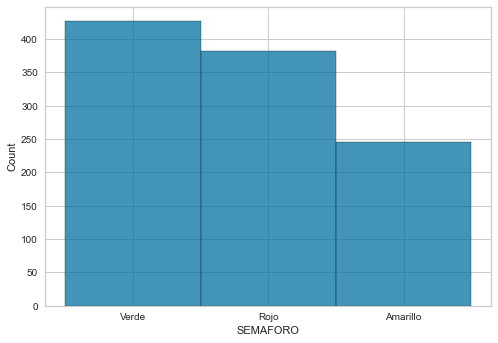

In [35]:
sns.histplot(x=df['SEMAFORO'])

Se observa un desbalance en la clase de los amarillos y verdes por lo que es necesario considerarlo para los modelos

In [66]:
# ARBOL DE DECISION

clf = DecisionTreeClassifier(random_state=1,class_weight={1:0.33, 2: 0.34, 0: 0.33})
clf = clf.fit(Xtrain_transformed, Ytrain)
y_predicted_clf = clf.predict(Xtrain_transformed)



# RANDOM FOREST

rfc = RandomForestClassifier(
            n_estimators = 10,
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 1,
            class_weight={1:0.33, 2: 0.34, 0: 0.33}
    
         )


rfc = rfc.fit(Xtrain_transformed, Ytrain)
y_predicted_rfc = rfc.predict(Xtrain_transformed)


### 4.Análisis de resultados con modelo de Decision Trees y Random Forest
- Realiza análisis de exactitudes (accuracies). A través de métricas de exactitud o classification report de scikitlearn.
- Realiza gráfica de confusion matrix

              precision    recall  f1-score   support

       Verde       1.00      1.00      1.00       355
    Amarillo       1.00      1.00      1.00       218
        Rojo       1.00      1.00      1.00       322

    accuracy                           1.00       895
   macro avg       1.00      1.00      1.00       895
weighted avg       1.00      1.00      1.00       895



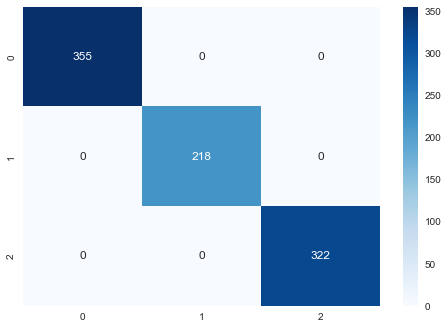

In [67]:
# ARBOL DE DECISION

# Reporte de metricas

print(classification_report(y_true=Ytrain,y_pred=y_predicted_clf,target_names=['Verde', 'Amarillo', 'Rojo']))



# Matriz de confusion
cm_clf = confusion_matrix(y_true=Ytrain,y_pred=y_predicted_clf)

sns.heatmap(cm_clf,annot=True,cmap='Blues',fmt='.0f',)
plt.show()

              precision    recall  f1-score   support

       Verde       1.00      1.00      1.00       355
    Amarillo       1.00      1.00      1.00       218
        Rojo       1.00      1.00      1.00       322

    accuracy                           1.00       895
   macro avg       1.00      1.00      1.00       895
weighted avg       1.00      1.00      1.00       895



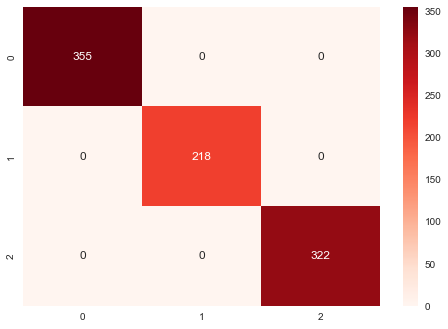

In [68]:
# Reporte de metricas

print(classification_report(y_true=Ytrain,y_pred=y_predicted_rfc,target_names=['Verde', 'Amarillo', 'Rojo']))



# Matriz de confusion
cm_rfc = confusion_matrix(y_true=Ytrain,y_pred=y_predicted_rfc)

sns.heatmap(cm_clf,annot=True,cmap='Reds',fmt='.0f',)
plt.show()

### 3. Importancia de las variables
Analiza la importancia de las variables a través de la función feature_importances.

In [74]:
feature_names = columnsTransformer.get_feature_names_out()# [f"feature {i}" for i in range(Xtrain_transformed.shape[1])]
importances = clf.feature_importances_
print(columnsTransformer.get_feature_names_out())

['numerical__ALC_mg/L' 'numerical__CONDUCT_mS/cm' 'numerical__SDT_M_mg/L'
 'numerical__FLUORUROS_mg/L' 'numerical__DUR_mg/L' 'numerical__N_NO3_mg/L'
 'categorical__CALIDAD_ALC_Baja'
 'categorical__CALIDAD_ALC_Indeseable como FAAP'
 'categorical__CALIDAD_ALC_Media'
 'categorical__CALIDAD_CONDUC_Dudosa para riego'
 'categorical__CALIDAD_CONDUC_Excelente para riego'
 'categorical__CALIDAD_CONDUC_Indeseable para riego'
 'categorical__CALIDAD_CONDUC_Permisible para riego'
 'categorical__CALIDAD_SDT_ra_Cultivos sensibles'
 'categorical__CALIDAD_SDT_ra_Cultivos tolerantes'
 'categorical__CALIDAD_SDT_ra_Excelente para riego'
 'categorical__CALIDAD_SDT_ra_Indeseable para riego'
 'categorical__CALIDAD_SDT_salin_Potable - Dulce'
 'categorical__CALIDAD_SDT_salin_Salinas'
 'categorical__CALIDAD_SDT_salin_Salobres'
 'categorical__CALIDAD_FLUO_Baja' 'categorical__CALIDAD_FLUO_Media'
 'categorical__CALIDAD_FLUO_Potable - Optima'
 'categorical__CALIDAD_DUR_Potable - Dura'
 'categorical__CALIDAD_DUR_Pot

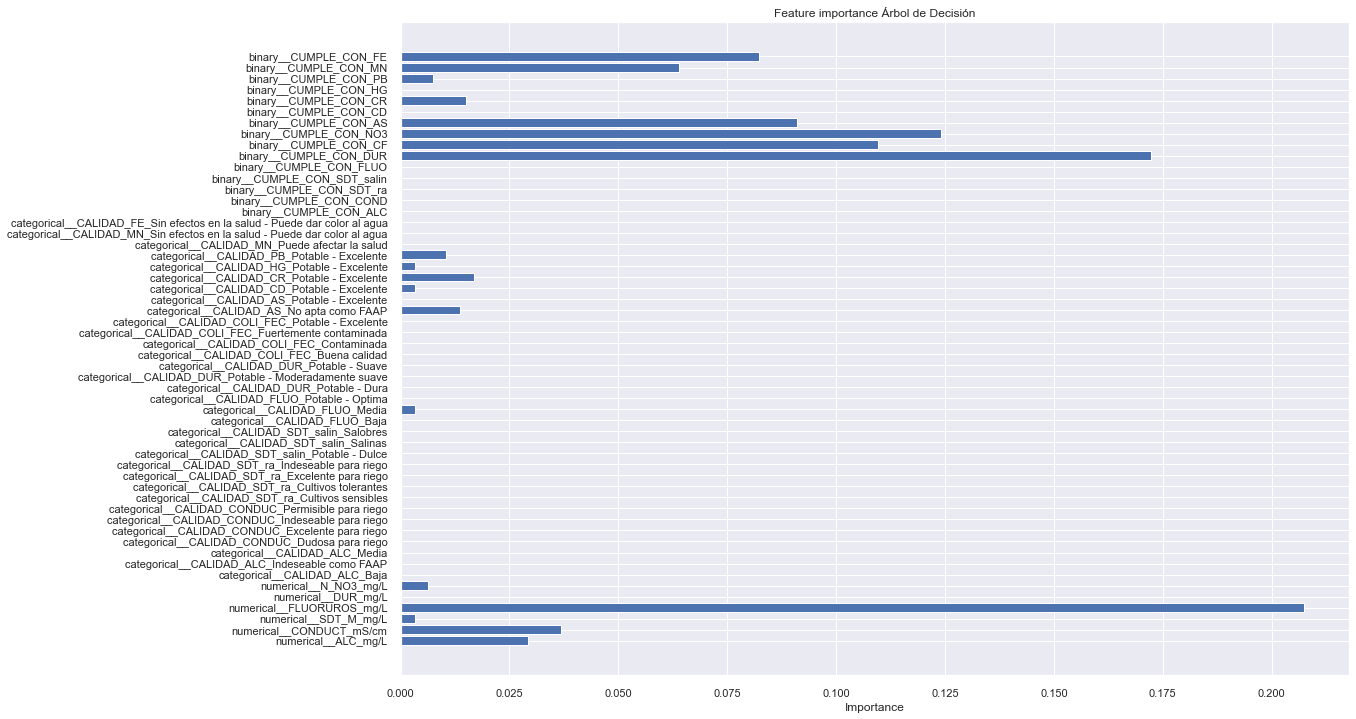

In [73]:
#fig, ax = plt.subplots(figsize = (20,20))
sns.set(rc={'figure.figsize':(17,12)})
plt.barh(feature_names, importances)
plt.title('Feature importance Árbol de Decisión')
plt.xlabel('Importance')
plt.show()

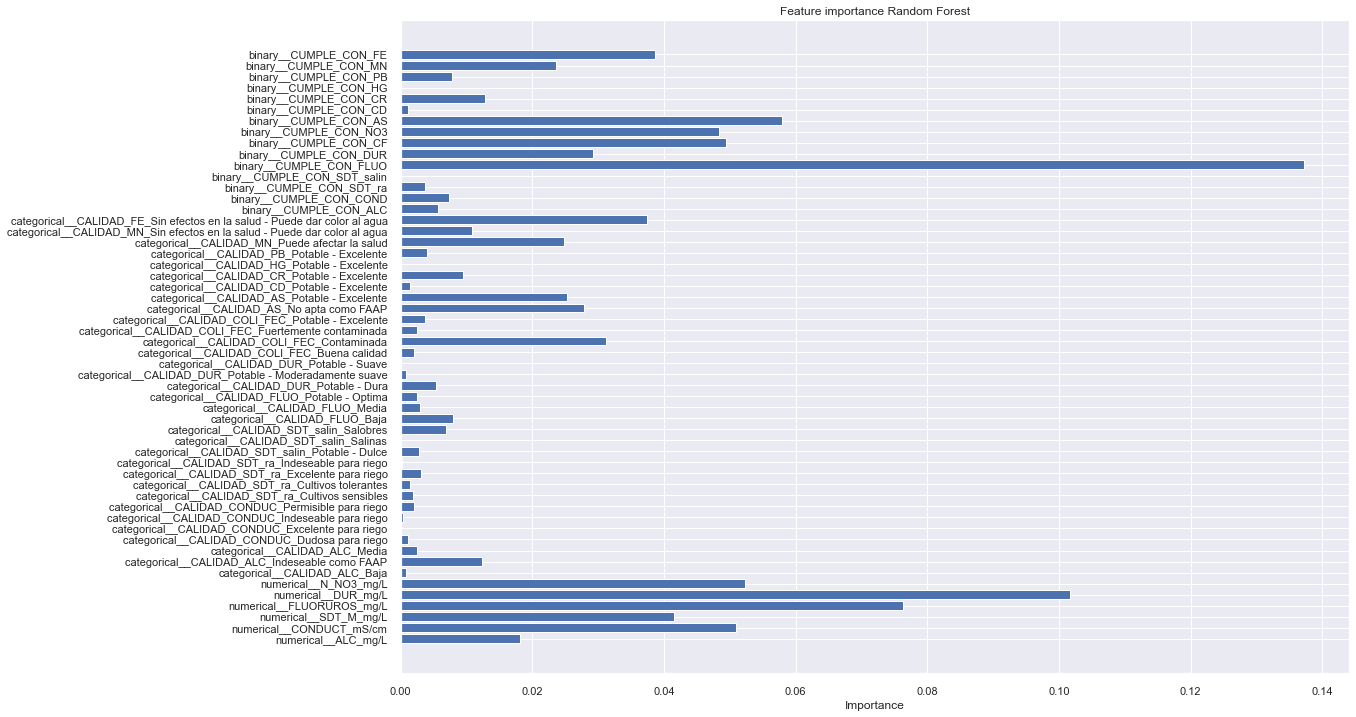

In [77]:
importances1 = rfc.feature_importances_
sns.set(rc={'figure.figsize':(17,12)})
plt.barh(feature_names, importances1)
plt.title('Feature importance Random Forest')
plt.xlabel('Importance')
plt.show()


### 5.Conclusiones
Describe los principales hallazgos del análisis y clasificación de los datos por medio de los modelos de Decision Trees y Random Forest.

Los modelos entrenados presentan un buen ajuste de clasificación al considerar los pesos por desbalanceo. A pesar de que las Feature Importance son distintas para ambos. Algo que se sospecha es el sobreentrenamiento de los modelos ya que los valores mostrandos en el reporte de clasificación es alto para cada una de las métricas